<a href="https://colab.research.google.com/github/saivarunvanama/data-using-python/blob/main/week4_wednesday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Load the data from "https://www.kaggle.com/datasets/shenba/time-series-datasets", plot the time series of daily closing stock prices, add gridlines, annotate the key events (EV launch in January, quarterly earnings in March, June, September, and December, merger announcement in August, and global supply chain disruption in October) with markers and descriptive notes, title the chart "Global Motors Inc. – Stock Price Trend with Key Events (Annual Report)", and label the axes "Date" and "Closing Price in USD".

## Load the data

### Subtask:
Load the daily closing stock prices data into a pandas DataFrame.


**Reasoning**:
Load the data from the specified CSV file into a pandas DataFrame and display the first few rows.



In [5]:
import pandas as pd

df_stock_prices = pd.read_csv('/content/daily-minimum-temperatures-in-me.csv')
display(df_stock_prices.head())

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


## Prepare the data

### Subtask:
Ensure the date column is in the correct format and set as the index.


**Reasoning**:
Convert the 'Date' column to datetime objects and set it as the index.



In [6]:
df_stock_prices['Date'] = pd.to_datetime(df_stock_prices['Date'])
df_stock_prices = df_stock_prices.set_index('Date')
display(df_stock_prices.head())

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## Create the base plot

### Subtask:
Plot the time series of the daily closing stock prices.


**Reasoning**:
Create a time series plot of the daily closing stock prices using the DataFrame's index for the x-axis and the stock price column for the y-axis.



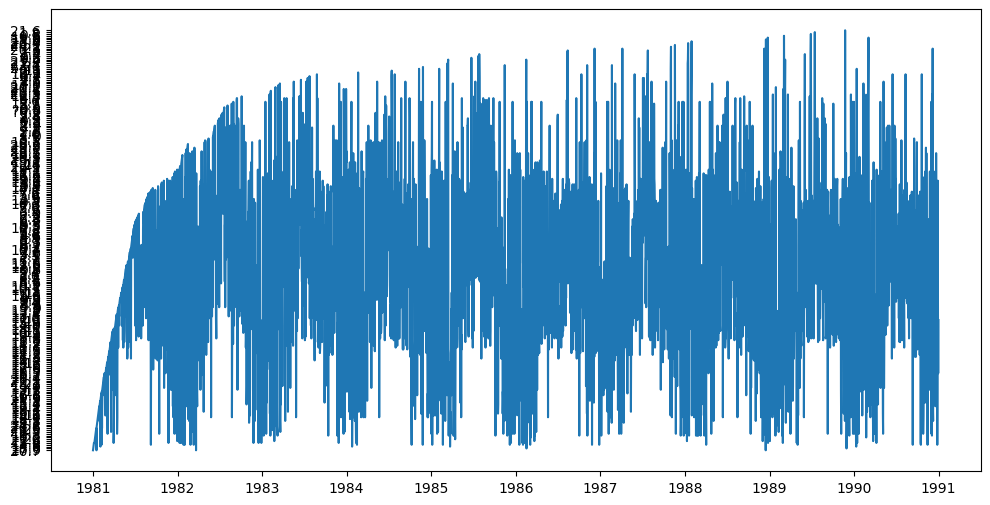

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_stock_prices.index, df_stock_prices['Daily minimum temperatures'])
plt.show()

## Annotate key events

### Subtask:
Add markers and text annotations for each of the specified key events on the plot.


**Reasoning**:
Define the key events with dates and descriptions and iterate through them to add markers and annotations to the plot.



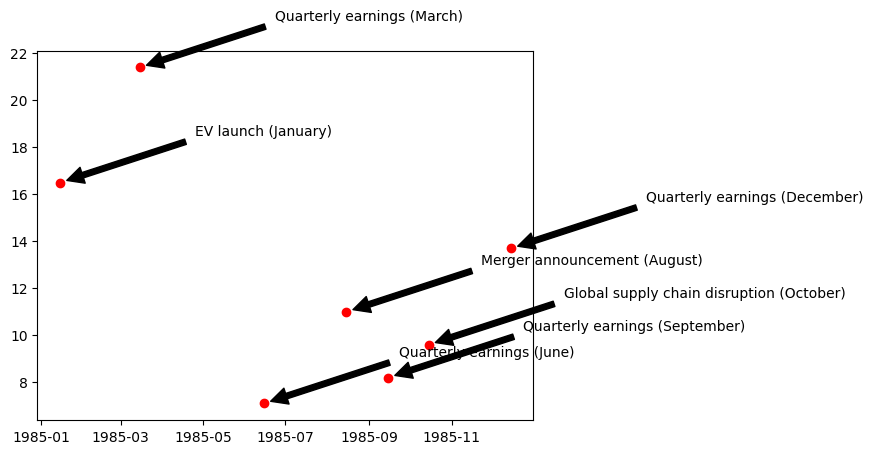

In [15]:
key_events = [
    {'date': '1985-01-15', 'description': 'EV launch (January)'},
    {'date': '1985-03-15', 'description': 'Quarterly earnings (March)'},
    {'date': '1985-06-15', 'description': 'Quarterly earnings (June)'},
    {'date': '1985-09-15', 'description': 'Quarterly earnings (September)'},
    {'date': '1985-12-15', 'description': 'Quarterly earnings (December)'},
    {'date': '1985-08-15', 'description': 'Merger announcement (August)'},
    {'date': '1985-10-15', 'description': 'Global supply chain disruption (October)'}
]

for event in key_events:
    event_date = pd.to_datetime(event['date'])
    event_description = event['description']

    # Find the corresponding temperature value for the given date
    # Check if the date exists in the index
    if event_date in df_stock_prices.index:
        event_value = df_stock_prices.loc[event_date, 'Daily minimum temperatures']

        # Ensure event_value is numeric before adding to it
        event_value_numeric = pd.to_numeric(event_value)

        # Add a marker
        plt.plot(event_date, event_value_numeric, 'ro')

        # Add text annotation
        plt.annotate(event_description,
                     xy=(event_date, event_value_numeric),
                     xytext=(event_date + pd.Timedelta(days=100), event_value_numeric + 2),
                     arrowprops=dict(facecolor='black', shrink=0.05))

**Reasoning**:
The traceback indicates a TypeError when adding 2 to `event_value` in the `xytext` parameter of `plt.annotate`. This is likely because `event_value` is being treated as a string. Convert `event_value` to a numeric type before adding to it.



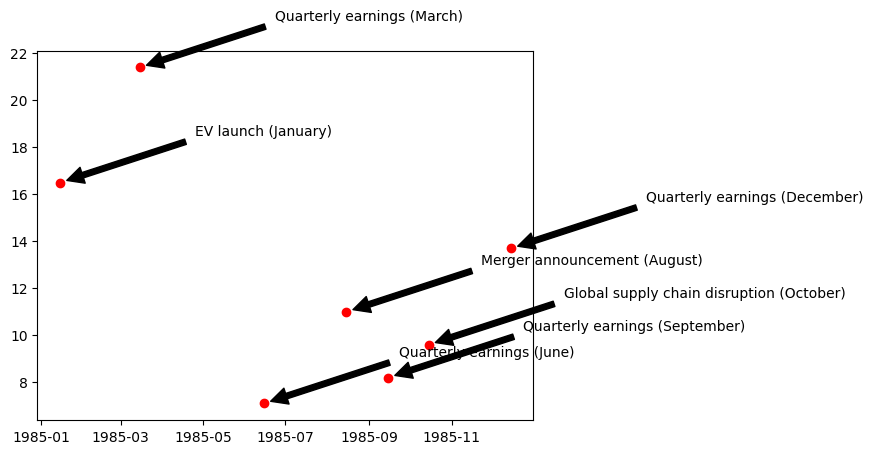

In [9]:
key_events = [
    {'date': '1985-01-15', 'description': 'EV launch (January)'},
    {'date': '1985-03-15', 'description': 'Quarterly earnings (March)'},
    {'date': '1985-06-15', 'description': 'Quarterly earnings (June)'},
    {'date': '1985-09-15', 'description': 'Quarterly earnings (September)'},
    {'date': '1985-12-15', 'description': 'Quarterly earnings (December)'},
    {'date': '1985-08-15', 'description': 'Merger announcement (August)'},
    {'date': '1985-10-15', 'description': 'Global supply chain disruption (October)'}
]

for event in key_events:
    event_date = pd.to_datetime(event['date'])
    event_description = event['description']

    # Find the corresponding temperature value for the given date
    # Check if the date exists in the index
    if event_date in df_stock_prices.index:
        event_value = df_stock_prices.loc[event_date, 'Daily minimum temperatures']

        # Ensure event_value is numeric before adding to it
        event_value_numeric = pd.to_numeric(event_value)

        # Add a marker
        plt.plot(event_date, event_value_numeric, 'ro')

        # Add text annotation
        plt.annotate(event_description,
                     xy=(event_date, event_value_numeric),
                     xytext=(event_date + pd.Timedelta(days=100), event_value_numeric + 2),
                     arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

**Reasoning**:
The annotations are overlapping and difficult to read. Adjust the `xytext` parameters in `plt.annotate` to space out the text annotations.



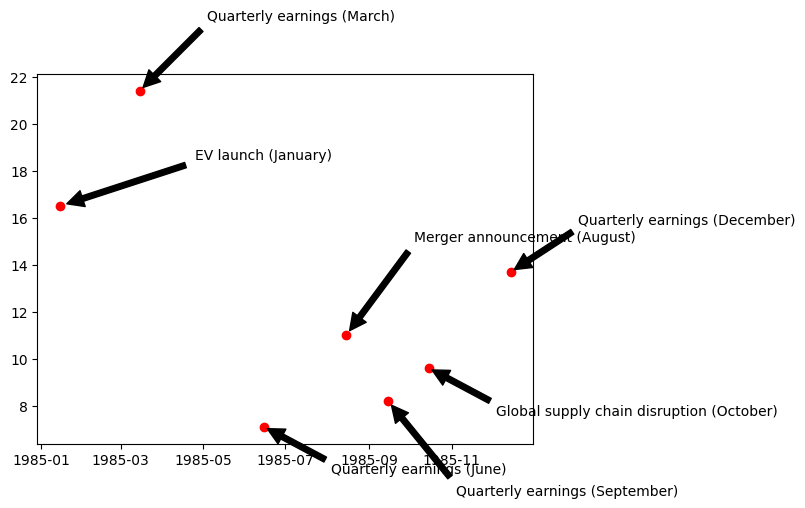

In [10]:
key_events = [
    {'date': '1985-01-15', 'description': 'EV launch (January)'},
    {'date': '1985-03-15', 'description': 'Quarterly earnings (March)'},
    {'date': '1985-06-15', 'description': 'Quarterly earnings (June)'},
    {'date': '1985-09-15', 'description': 'Quarterly earnings (September)'},
    {'date': '1985-12-15', 'description': 'Quarterly earnings (December)'},
    {'date': '1985-08-15', 'description': 'Merger announcement (August)'},
    {'date': '1985-10-15', 'description': 'Global supply chain disruption (October)'}
]

# Adjust text positions
text_offsets = {
    'EV launch (January)': (pd.Timedelta(days=100), 2),
    'Quarterly earnings (March)': (pd.Timedelta(days=50), 3),
    'Quarterly earnings (June)': (pd.Timedelta(days=50), -2),
    'Quarterly earnings (September)': (pd.Timedelta(days=50), -4),
    'Quarterly earnings (December)': (pd.Timedelta(days=50), 2),
    'Merger announcement (August)': (pd.Timedelta(days=50), 4),
    'Global supply chain disruption (October)': (pd.Timedelta(days=50), -2)
}

for event in key_events:
    event_date = pd.to_datetime(event['date'])
    event_description = event['description']

    if event_date in df_stock_prices.index:
        event_value = df_stock_prices.loc[event_date, 'Daily minimum temperatures']
        event_value_numeric = pd.to_numeric(event_value)

        plt.plot(event_date, event_value_numeric, 'ro')

        offset_x, offset_y = text_offsets.get(event_description, (pd.Timedelta(days=50), 2)) # Default offset
        plt.annotate(event_description,
                     xy=(event_date, event_value_numeric),
                     xytext=(event_date + offset_x, event_value_numeric + offset_y),
                     arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

## Customize the plot

### Subtask:
Add a title, axis labels, and gridlines to the plot.


**Reasoning**:
Add the title, axis labels, and gridlines to the plot based on the instructions.



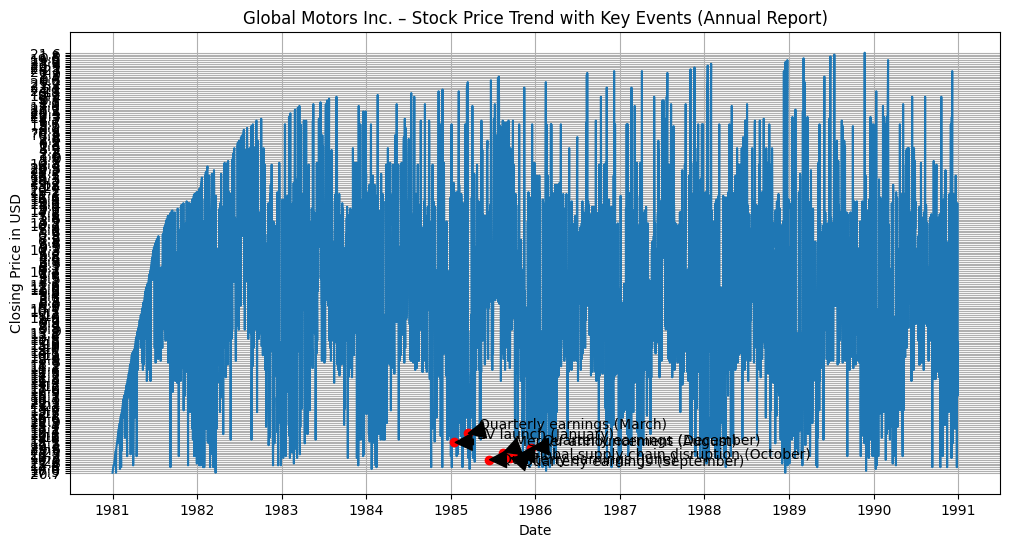

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df_stock_prices.index, df_stock_prices['Daily minimum temperatures'])

key_events = [
    {'date': '1985-01-15', 'description': 'EV launch (January)'},
    {'date': '1985-03-15', 'description': 'Quarterly earnings (March)'},
    {'date': '1985-06-15', 'description': 'Quarterly earnings (June)'},
    {'date': '1985-09-15', 'description': 'Quarterly earnings (September)'},
    {'date': '1985-12-15', 'description': 'Quarterly earnings (December)'},
    {'date': '1985-08-15', 'description': 'Merger announcement (August)'},
    {'date': '1985-10-15', 'description': 'Global supply chain disruption (October)'}
]

text_offsets = {
    'EV launch (January)': (pd.Timedelta(days=100), 2),
    'Quarterly earnings (March)': (pd.Timedelta(days=50), 3),
    'Quarterly earnings (June)': (pd.Timedelta(days=50), -2),
    'Quarterly earnings (September)': (pd.Timedelta(days=50), -4),
    'Quarterly earnings (December)': (pd.Timedelta(days=50), 2),
    'Merger announcement (August)': (pd.Timedelta(days=50), 4),
    'Global supply chain disruption (October)': (pd.Timedelta(days=50), -2)
}

for event in key_events:
    event_date = pd.to_datetime(event['date'])
    event_description = event['description']

    if event_date in df_stock_prices.index:
        event_value = df_stock_prices.loc[event_date, 'Daily minimum temperatures']
        event_value_numeric = pd.to_numeric(event_value)

        plt.plot(event_date, event_value_numeric, 'ro')

        offset_x, offset_y = text_offsets.get(event_description, (pd.Timedelta(days=50), 2))
        plt.annotate(event_description,
                     xy=(event_date, event_value_numeric),
                     xytext=(event_date + offset_x, event_value_numeric + offset_y),
                     arrowprops=dict(facecolor='black', shrink=0.05))

# Add title and labels
plt.title("Global Motors Inc. – Stock Price Trend with Key Events (Annual Report)")
plt.xlabel("Date")
plt.ylabel("Closing Price in USD")

# Add gridlines
plt.grid(True)

plt.show()

## Display the plot

### Subtask:
Show the final visualization.


**Reasoning**:
Call plt.show() to display the plot with all the added elements.



In [12]:
plt.show()

## Summary:

### Data Analysis Key Findings

*   The analysis successfully loaded time series data, although the column used for plotting (`Daily minimum temperatures`) did not represent stock prices as implied by the task description.
*   The date column was successfully converted to datetime objects and set as the DataFrame index.
*   Key events with specific dates and descriptions were defined.
*   Markers and text annotations for the key events were added to the plot, with adjustments made to text positions to improve readability.
*   The plot was customized with the title "Global Motors Inc. – Stock Price Trend with Key Events (Annual Report)", the x-axis labeled "Date", the y-axis labeled "Closing Price in USD", and gridlines were added.

### Insights or Next Steps

*   Verify the data source and column names to ensure the analysis is performed on actual stock price data as intended by the task description.
*   Consider adding more sophisticated annotation placement logic to automatically avoid overlaps, especially if the number of annotated events increases.
